In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

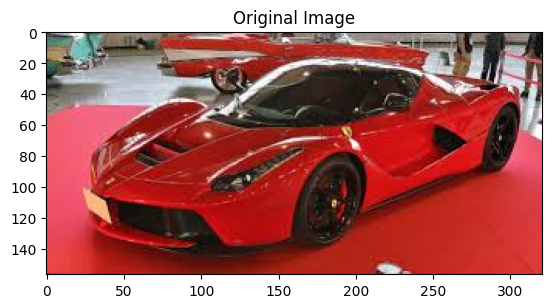

In [2]:
image = cv2.imread('ferrari.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image)
plt.title('Original Image')
plt.show()

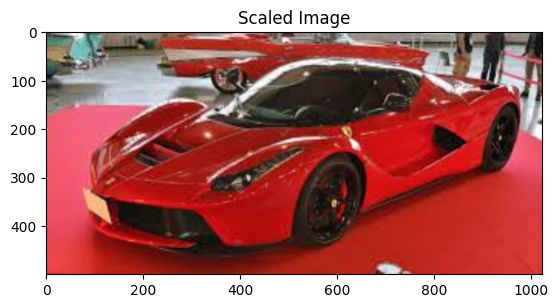

In [11]:
# Resize the image for faster processing
scaled_image = cv2.resize(image, (1024, int(1024 * image.shape[0] / image.shape[1])))

# Display the scaled image
plt.imshow(scaled_image)
plt.title('Scaled Image')
plt.show()

In [4]:
mask = np.zeros(scaled_image.shape[:2], np.uint8)
rect = (10, 10, scaled_image.shape[1] - 20, scaled_image.shape[0] - 20)

In [5]:
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

cv2.grabCut(scaled_image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[2.47942289e-01, 2.11434589e-01, 1.51124792e-01, 2.67305789e-01,
         1.22192541e-01, 1.87699462e+02, 3.96823808e+01, 2.92216936e+01,
         2.03258412e+02, 1.91430908e+02, 1.94907435e+02, 1.43044833e+02,
         1.36427067e+02, 1.27003111e+02, 2.29607416e+02, 7.62284110e+01,
         8.96512792e+01, 8.56301324e+01, 7.35297033e+01, 6.44479174e+01,
         2.19316841e+02, 6.78607006e+01, 9.54594812e+01, 6.78607006e+01,
         3.01989449e+01, 3.97867208e+01, 9.54594812e+01, 3.97867208e+01,
         5.90482360e+01, 5.93843523e+02, 3.84314404e+02, 3.47503804e+02,
         3.84314404e+02, 1.07492285e+03, 1.01740993e+03, 3.47503804e+02,
         1.01740993e+03, 1.02888702e+03, 3.17759587e+02, 1.01426045e+02,
         7.13573004e+01, 1.01426045e+02, 3.7

In [6]:
# Manually refine the mask to improve segmentation
newmask = np.zeros(scaled_image.shape[:2], np.uint8)

# Assuming user manually marks foreground and background more precisely
newmask[40:600, 20:1000] = 1  # Foreground
newmask[0:40, 0:20] = 0       # Background

mask[newmask == 0] = 0
mask[newmask == 1] = 1

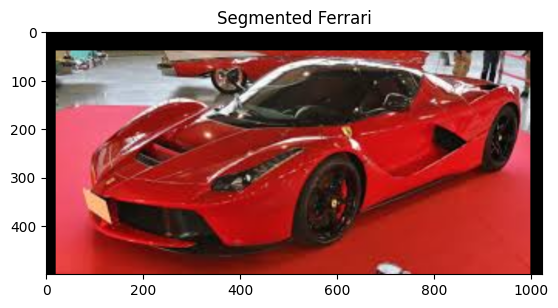

In [7]:
cv2.grabCut(scaled_image, mask, None, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_MASK)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
segmented_image = scaled_image * mask2[:, :, np.newaxis]

# Display the segmented image
plt.imshow(segmented_image)
plt.title('Segmented Ferrari')
plt.show()
